In [23]:
import pandas as pd
import matplotlib.pyplot as plt


# Load the data
df = pd.read_csv('insurance.csv')

In [24]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [26]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [27]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [128]:
df['sex'] = df['sex'].map({'male': 0, 'female': 1})

In [30]:
df['smoker'] = df['smoker'].map({'no': 0, 'yes': 1})

In [13]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [31]:
df = pd.get_dummies(df, columns=['region'])

In [32]:
df.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,False,False,False,True
1,18,0,33.770,1,0,1725.55230,False,False,True,False
2,28,0,33.000,3,0,4449.46200,False,False,True,False
3,33,0,22.705,0,0,21984.47061,False,True,False,False
4,32,0,28.880,0,0,3866.85520,False,True,False,False


In [33]:
df.corr()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,0.020856,0.109272,0.042469,-0.025019,0.299008,0.002475,-0.000407,-0.011642,0.010016
sex,0.020856,1.000000,-0.046371,-0.017163,-0.076185,-0.057292,0.002425,0.011156,-0.017117,0.004184
bmi,0.109272,-0.046371,1.000000,0.012759,0.003750,0.198341,-0.138156,-0.135996,0.270025,-0.006205
children,0.042469,-0.017163,0.012759,1.000000,0.007673,0.067998,-0.022808,0.024806,-0.023066,0.021914
smoker,-0.025019,-0.076185,0.003750,0.007673,1.000000,0.787251,0.002811,-0.036945,0.068498,-0.036945
charges,0.299008,-0.057292,0.198341,0.067998,0.787251,1.000000,0.006349,-0.039905,0.073982,-0.043210
region_northeast,0.002475,0.002425,-0.138156,-0.022808,0.002811,0.006349,1.000000,-0.320177,-0.345561,-0.320177
region_northwest,-0.000407,0.011156,-0.135996,0.024806,-0.036945,-0.039905,-0.320177,1.000000,-0.346265,-0.320829
region_southeast,-0.011642,-0.017117,0.270025,-0.023066,0.068498,0.073982,-0.345561,-0.346265,1.000000,-0.346265
region_southwest,0.010016,0.004184,-0.006205,0.021914,-0.036945,-0.043210,-0.320177,-0.320829,-0.346265,1.000000


In [35]:
# Average charges by smoker status
print(df.groupby('smoker')['charges'].mean())

smoker
0     8434.268298
1    32050.231832
Name: charges, dtype: float64


In [39]:
# Group by region and calculate mean bmi
region_group = df.groupby(['region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']).mean()['bmi']
region_group.head()

region_northeast  region_northwest  region_southeast  region_southwest
False             False             False             True                30.596615
                                    True              False               33.355989
                  True              False             False               29.199785
True              False             False             False               29.173503
Name: bmi, dtype: float64

In [40]:
# Group by smoker and calculate multiple aggregations
smoker_group = df.groupby('smoker')['charges'].agg(['mean', 'std', 'count'])
print(smoker_group)

                mean           std  count
smoker                                   
0        8434.268298   5993.781819   1064
1       32050.231832  11541.547176    274


In [43]:
# Average charges by smoker status
print(df.groupby('sex')['smoker'].count())

sex
0    676
1    662
Name: smoker, dtype: int64


In [46]:
#sum(): Calculate the sum of the values in each group.

print(df.groupby('sex')['smoker'].sum())

sex
0    159
1    115
Name: smoker, dtype: int64


In [49]:
#max(): Find the maximum value in each group.

print(df.groupby('sex')['smoker'].max())

sex
0    1
1    1
Name: smoker, dtype: int64


In [50]:
#std(): Calculate the standard deviation of the values in each group.

print(df.groupby('smoker')['charges'].std())

smoker
0     5993.781819
1    11541.547176
Name: charges, dtype: float64


In [53]:
# describe(): Generate a summary of the central tendency and variability of the values in each group.
df.groupby('smoker')['sex'].describe()

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
0,1064.0,0.514098,0.500036,0.0,0.0,1.0,1.0,1.0
1,274.0,0.419708,0.494414,0.0,0.0,0.0,1.0,1.0


In [55]:
df.groupby(['smoker', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']).size()

smoker  region_northeast  region_northwest  region_southeast  region_southwest
0       False             False             False             True                267
                                            True              False               273
                          True              False             False               267
        True              False             False             False               257
1       False             False             False             True                 58
                                            True              False                91
                          True              False             False                58
        True              False             False             False                67
dtype: int64

In [59]:
print(df.groupby(['region_northeast', 'region_northwest', 'region_southeast', 'region_southwest'])['smoker'].sum())

region_northeast  region_northwest  region_southeast  region_southwest
False             False             False             True                58
                                    True              False               91
                  True              False             False               58
True              False             False             False               67
Name: smoker, dtype: int64


In [62]:
df.groupby('smoker')['region_southwest'].sum()

smoker
0    267
1     58
Name: region_southwest, dtype: int64

In [67]:
df.pivot_table(index='smoker', columns='region_northeast', values='sex')

region_northeast,False,True
smoker,,
0,0.514250,0.513619
1,0.415459,0.432836


In [71]:
#value_counts(): This function returns a Series containing counts of unique rows in the DataFrame.

df[['smoker', 'sex']].value_counts()

smoker  sex
0       1      547
        0      517
1       0      159
        1      115
Name: count, dtype: int64

In [73]:
#crosstab(): This function computes a simple cross-tabulation of two factors.
pd.crosstab(df['smoker'], df['sex'])

sex,0,1
smoker,,
0,517,547
1,159,115


In [74]:
#crosstab(): This function computes a simple cross-tabulation of two factors.
pd.crosstab(df['smoker'], df['age'])

age,18,19,20,21,22,23,24,25,26,27,...,55,56,57,58,59,60,61,62,63,64
smoker,,,,,,,,,,,,,,,,,,,,,
0,57,50,20,26,22,21,22,23,25,19,...,24,22,22,24,21,18,17,19,18,15
1,12,18,9,2,6,7,6,5,3,9,...,2,4,4,1,4,5,6,4,5,7


In [88]:
#query(): This function allows you to filter the data using a boolean expression.
df.query('smoker == 0 and age > 30').info()

<class 'pandas.core.frame.DataFrame'>
Index: 715 entries, 3 to 1333
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               715 non-null    int64  
 1   sex               715 non-null    int64  
 2   bmi               715 non-null    float64
 3   children          715 non-null    int64  
 4   smoker            715 non-null    int64  
 5   charges           715 non-null    float64
 6   region_northeast  715 non-null    bool   
 7   region_northwest  715 non-null    bool   
 8   region_southeast  715 non-null    bool   
 9   region_southwest  715 non-null    bool   
dtypes: bool(4), float64(2), int64(4)
memory usage: 41.9 KB


In [91]:
#filter(): This function allows you to filter the data using a boolean array or expression.

df.filter(items=['smoker', 'age'])

,smoker,age
0,1,19
1,0,18
2,0,28
3,0,33
4,0,32
...,...,...
1333,0,50
1334,0,18
1335,0,18
1336,0,21


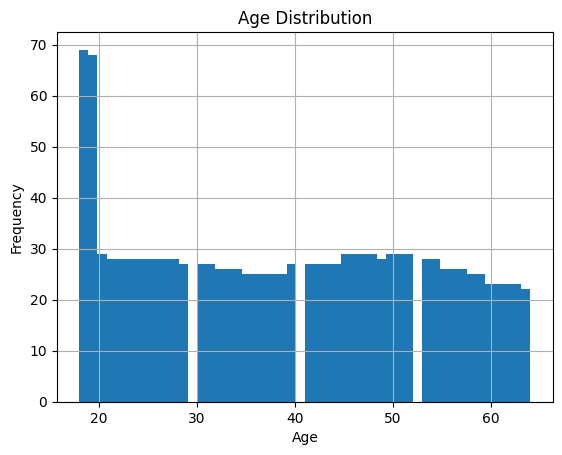

In [95]:
df['age'].hist(bins=50)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

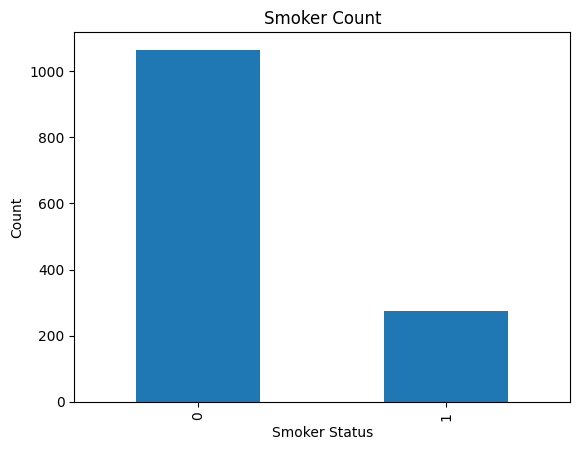

In [96]:
# Bar Chart of Smoker Count:

smoker_count = df['smoker'].value_counts()
smoker_count.plot(kind='bar')
plt.title('Smoker Count')
plt.xlabel('Smoker Status')
plt.ylabel('Count')
plt.show()

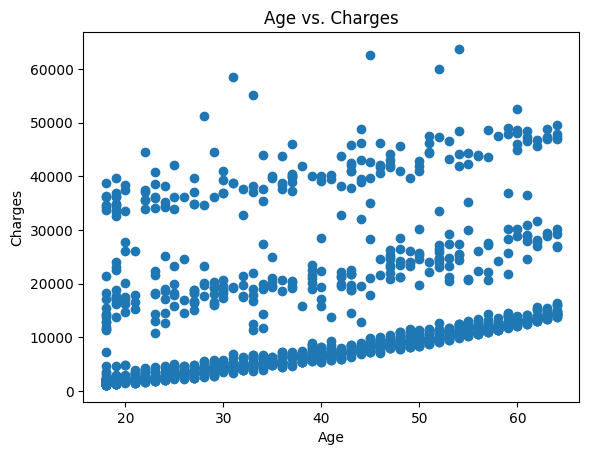

In [97]:
# Scatter Plot of Age vs. Charges:

plt.scatter(df['age'], df['charges'])
plt.title('Age vs. Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

<Axes: xlabel='smoker'>

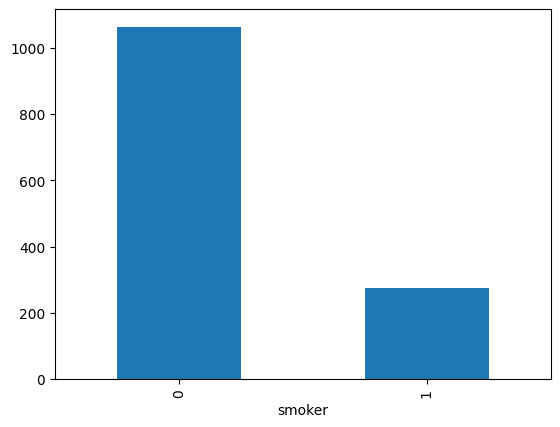

In [98]:
df['smoker'].value_counts().plot(kind='bar')

{'bodies': [<matplotlib.collections.PolyCollection at 0x161a3ccfd10>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x161a675c200>,
 'cmins': <matplotlib.collections.LineCollection at 0x161a6864f50>,
 'cbars': <matplotlib.collections.LineCollection at 0x161a6889a60>}

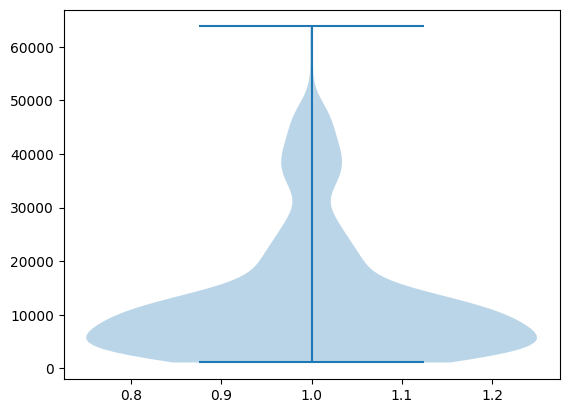

In [99]:
plt.violinplot(df['charges'])

<Axes: xlabel='sex'>

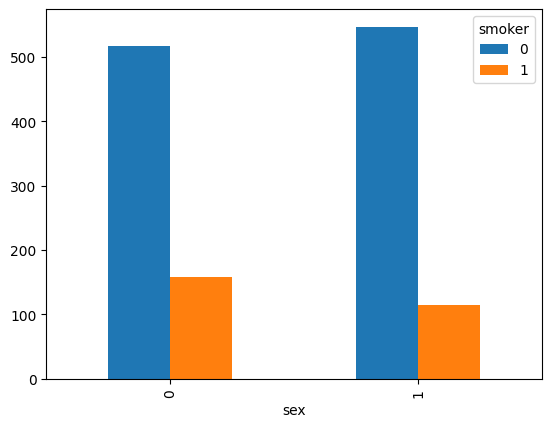

In [100]:
pd.crosstab(df['sex'], df['smoker']).plot(kind='bar')

In [159]:
pd.crosstab(df['age'], df['smoker']).plot(kind='bar')

TypeError: no numeric data to plot

<Axes: ylabel='age'>

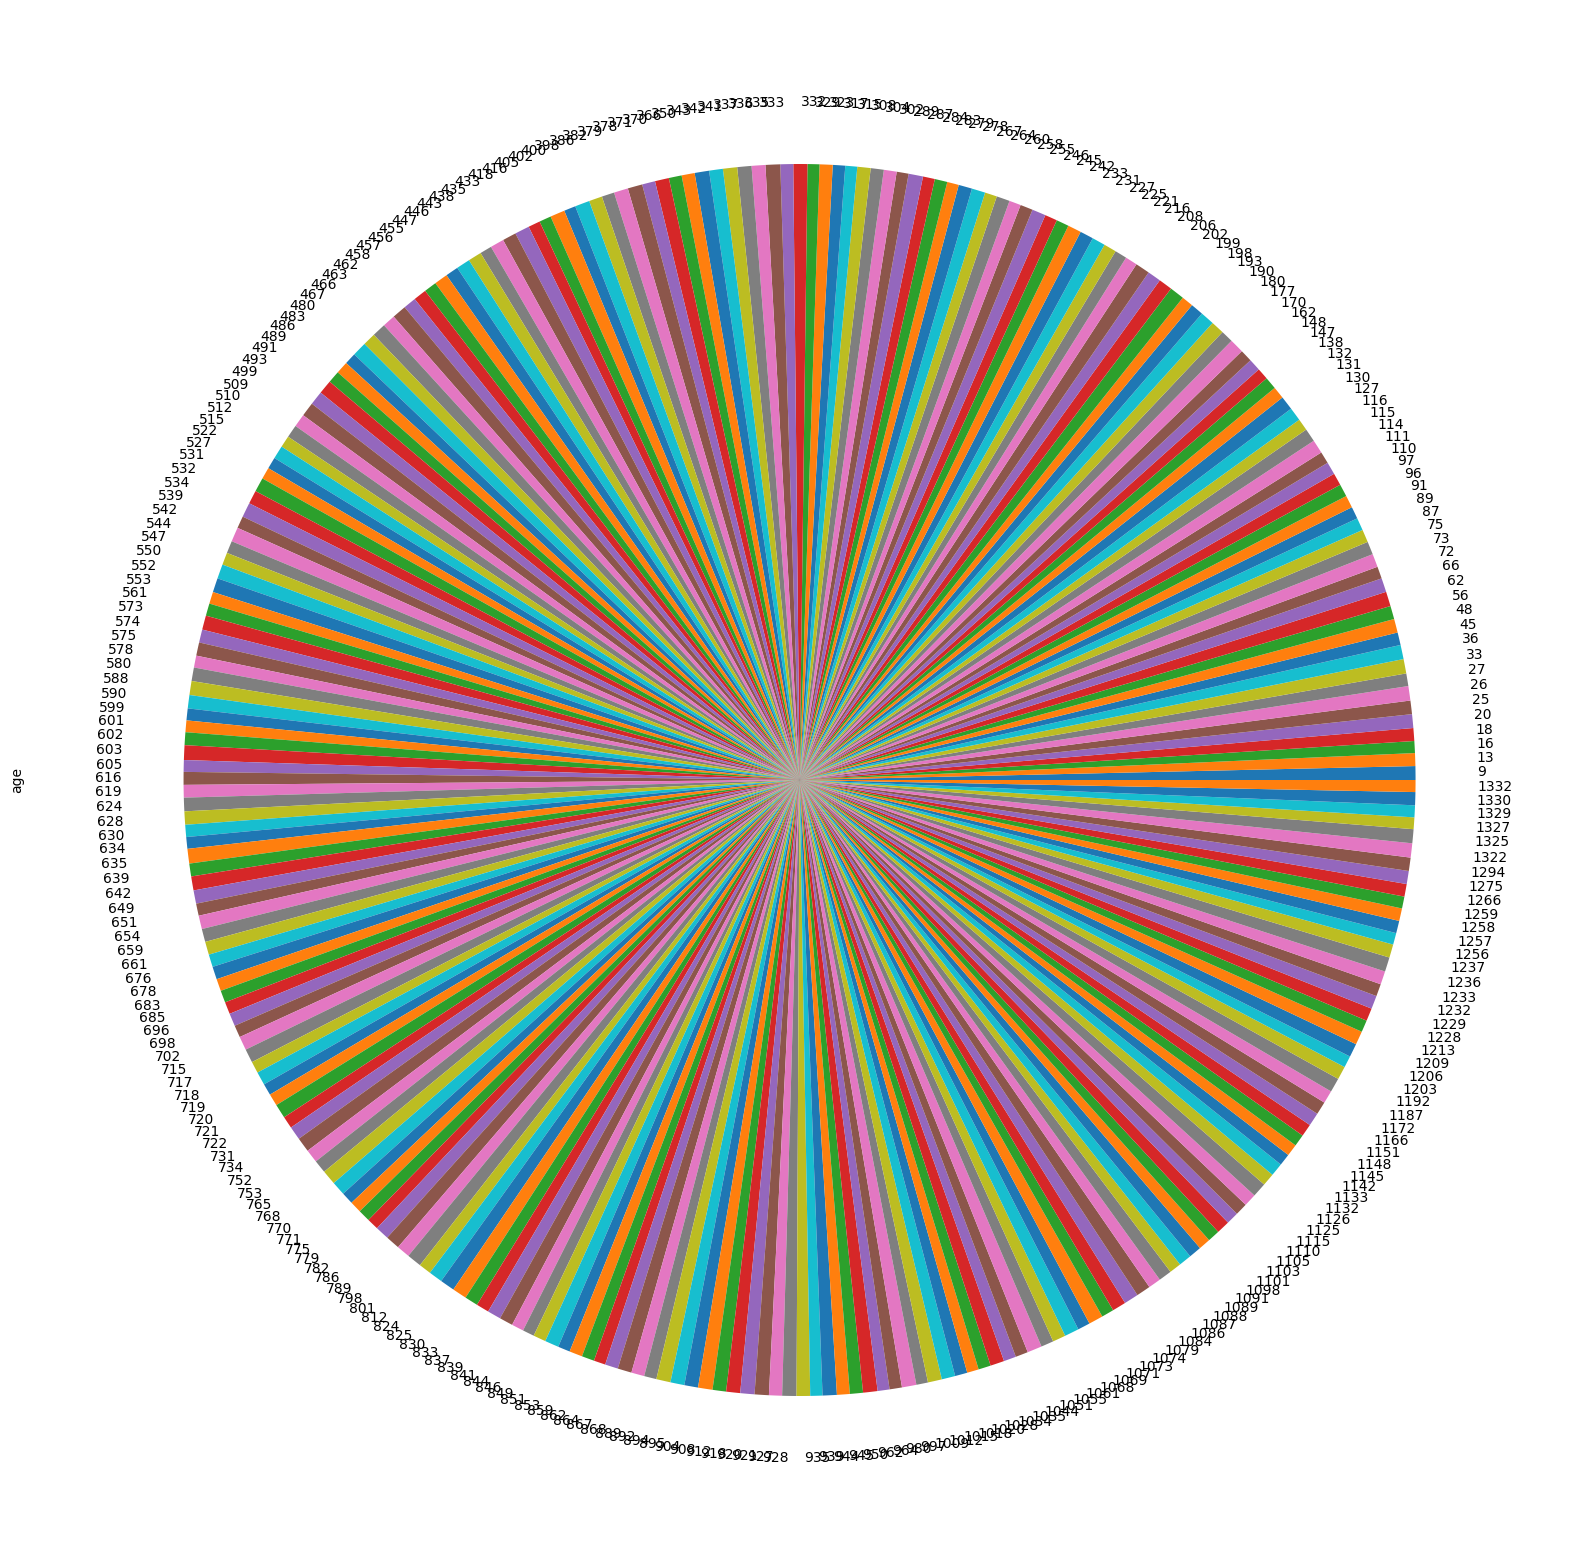

In [123]:
df.query('smoker == 0 and age > 50')['age'].plot(kind='pie', figsize=(20,20))

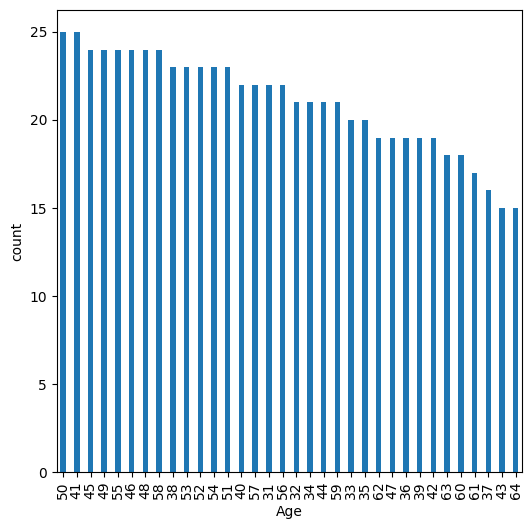

In [124]:
df.query('smoker == 0 and age > 30')['age'].value_counts().plot(kind='bar', figsize=(6,6), width=0.4)
plt.xlabel('Age')  # Add x-axis label
plt.ylabel('count')  # Add y-axis label

plt.show()

In [125]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest'],
      dtype='object')

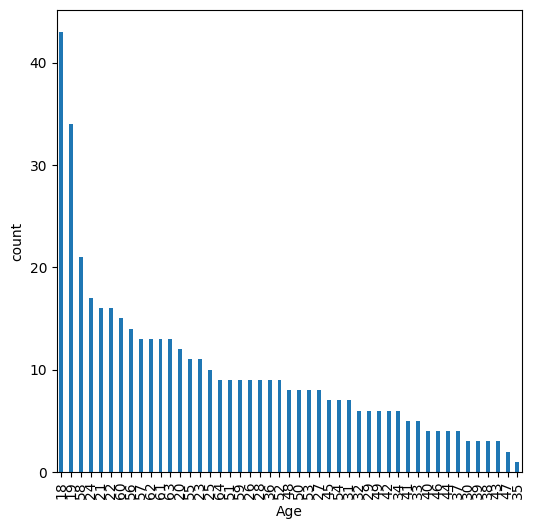

In [127]:
df.query('smoker == 0 and children ==0')['age'].value_counts().plot(kind='bar', figsize=(6,6), width=0.4)
plt.xlabel('Age')  # Add x-axis label
plt.ylabel('count')  # Add y-axis label

plt.show()

In [130]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.multioutput import MultiOutputClassifier

X = df[['age', 'sex', 'bmi', 'children', 'smoker', 'charges']]
y = df[['region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']]

clf = MultiOutputClassifier(DecisionTreeClassifier())
clf.fit(X, y)

MultiOutputClassifier(estimator=DecisionTreeClassifier())

In [132]:
y_pred = clf.predict(X)

In [133]:
# Calculate accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [135]:

# Input values
input_values = [[30, 1, 25, 2, 1, 1000]]  # age, sex, bmi, children, smoker, charges

# Predict values
predicted_values = clf.predict(input_values)

print("Predicted Regions:", predicted_values)


Predicted Regions: [[False  True  True  True]]


c:\Users\Mega Computer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\Mega Computer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\Mega Computer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\Mega Computer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [136]:
# Get the column names of the target variables
region_labels = y.columns

# Predict values
predicted_values = clf.predict(input_values)

# Print the predicted labels
predicted_labels = [region_labels[i] for i, value in enumerate(predicted_values[0]) if value]
print("Predicted Regions:", predicted_labels)

Predicted Regions: ['region_northwest', 'region_southeast', 'region_southwest']


c:\Users\Mega Computer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\Mega Computer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\Mega Computer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\Mega Computer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
